In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # used for plot interactive graph. 

import plotly.express as px

from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [10]:
greypartridge_data = pd.read_csv('D:/UK/assignment/DSA8023/Analython_2/greypartridge/greypartridge_features.csv')
stockdove_data = pd.read_csv('D:/UK/assignment/DSA8023/Analython_2/stockdove/stockdove_features.csv')
turtledove_data = pd.read_csv('D:/UK/assignment/DSA8023/Analython_2/turtledove/turtledove_features.csv')
yellowhammer_data = pd.read_csv('D:/UK/assignment/DSA8023/Analython_2/yellowhammer/yellowhammer_features.csv')

In [21]:
bird_cat = {'turtledove': 0, 'greypartridge': 1, 'yellowhammer': 2, 'stockdove': 3}

turtledove_data['bird'] = 0
greypartridge_data['bird'] = 1
yellowhammer_data['bird'] = 2
stockdove_data['bird'] = 3

bird_df = pd.concat([turtledove_data, greypartridge_data, yellowhammer_data, stockdove_data]).reset_index(drop=True)

def strip_clip_label(s):
    return s.split('-')[2].split('_')[0]

bird_df['clip'] = bird_df['clip'].apply(strip_clip_label)


In [38]:
bird_df.columns

Index(['Unnamed: 0', 'zcr_mean', 'energy_mean', 'energy_entropy_mean',
       'spectral_centroid_mean', 'spectral_spread_mean',
       'spectral_entropy_mean', 'spectral_flux_mean', 'spectral_rolloff_mean',
       'mfcc_1_mean',
       ...
       'delta chroma_6_std', 'delta chroma_7_std', 'delta chroma_8_std',
       'delta chroma_9_std', 'delta chroma_10_std', 'delta chroma_11_std',
       'delta chroma_12_std', 'delta chroma_std_std', 'clip', 'bird'],
      dtype='object', length=139)

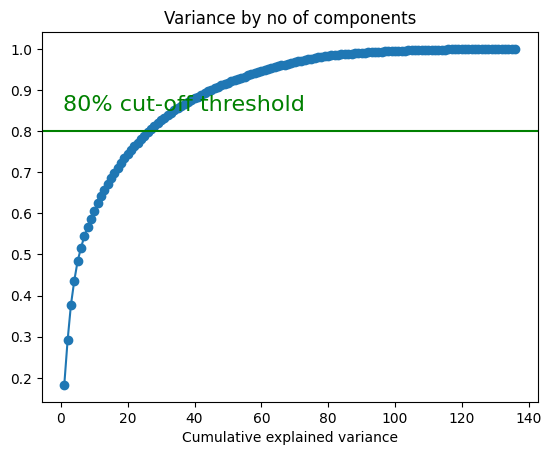

shape of pca (4000, 27)


In [71]:

from sklearn.decomposition import PCA

df_2 = bird_df.copy()

df_2 = df_2.drop(columns=['Unnamed: 0', 'bird', 'clip'])

scaler = StandardScaler()
data_rescaled = scaler.fit_transform(df_2)

pca = PCA(n_components = 0.80)
pca.fit(data_rescaled)
reduced = pca.transform(data_rescaled)


pca = PCA(n_components=len(df_2.columns)).fit(data_rescaled)


# plt.ylim(0.0,1.1)

plt.figure()
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker='o')

plt.title('Variance by no of components')
plt.xlabel('No of components')
plt.xlabel('Cumulative explained variance')

plt.axhline(y=0.80, color='g', linestyle='-')
plt.text(0.5, 0.85, '80% cut-off threshold', color = 'green', fontsize=16)

# ax.grid(axis='x')
plt.show()

print('shape of pca {}'.format(reduced.shape))

def constructCols(len):
    feature_cols = []
    for i in range(0,len):
        feature_cols.append('Feature{}'.format(i))

    return feature_cols



In [23]:
# df_2.cov().to_excel('D:/UK/assignment/DSA8023/Analython_2/covariance.xlsx')

In [24]:
pca.explained_variance_ratio_ * 100

array([1.82695985e+01, 1.08687895e+01, 8.63934530e+00, 5.87513063e+00,
       4.72951840e+00, 3.19232558e+00, 2.86611801e+00, 2.15713946e+00,
       2.03187994e+00, 1.91634031e+00, 1.86676273e+00, 1.75686382e+00,
       1.59572826e+00, 1.47560932e+00, 1.32968827e+00, 1.26861205e+00,
       1.24139217e+00, 1.20253373e+00, 1.12904485e+00, 1.00272570e+00,
       9.46607454e-01, 9.26239043e-01, 8.88963531e-01, 8.84028521e-01,
       8.20197916e-01, 7.97614693e-01, 7.71471370e-01, 7.42654637e-01,
       7.14533478e-01, 7.07470550e-01, 6.57746857e-01, 6.11838910e-01,
       5.93102870e-01, 5.54166940e-01, 5.46545239e-01, 5.23769188e-01,
       4.89784965e-01, 4.83380033e-01, 4.67335312e-01, 4.49299930e-01,
       4.30896673e-01, 4.18993720e-01, 4.09809073e-01, 3.96694002e-01,
       3.87655720e-01, 3.74874034e-01, 3.63317050e-01, 3.54917076e-01,
       3.51463389e-01, 3.12186788e-01, 3.09671336e-01, 2.99585975e-01,
       2.95407757e-01, 2.87140467e-01, 2.84068827e-01, 2.76977611e-01,
      

In [74]:
final_df = pd.DataFrame(reduced, columns=constructCols(len(reduced[0])))

In [75]:
df_2 = bird_df.copy()

df_2 = df_2.drop(columns=['Unnamed: 0', 'bird', 'clip'])

In [76]:
df_2 = final_df.copy()

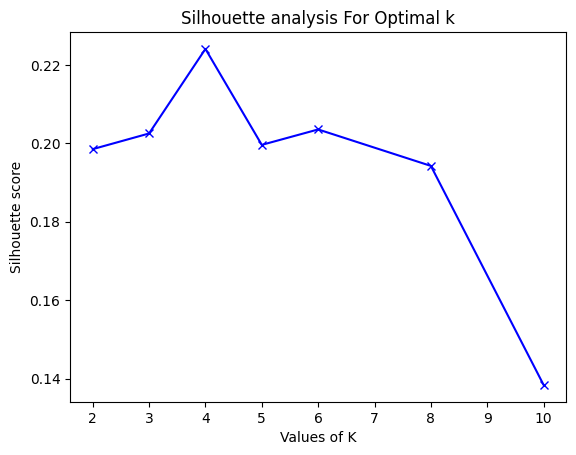

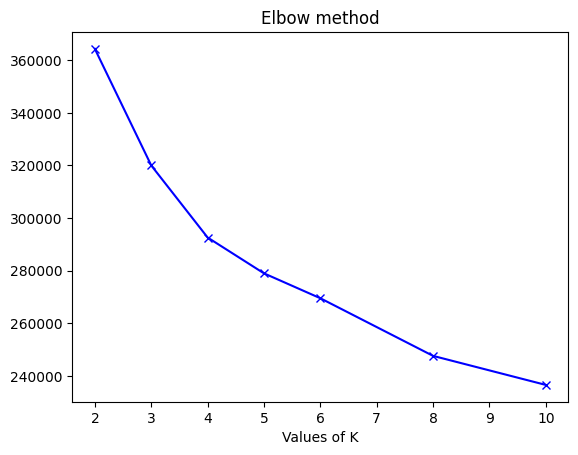

In [128]:
range_n_clusters = [2, 3, 4, 5, 6, 8 , 10]
silhouette_avg = []
wcss = []

for num_clusters in range_n_clusters:
 
 # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, n_init=10)
    kmeans.fit(df_2)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(df_2, cluster_labels))
    wcss.append(kmeans.inertia_)

plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

# elbow method
plt.plot(range_n_clusters, wcss, 'bx-') 
plt.xlabel('Values of K') 
plt.title('Elbow method')
plt.show()

In [114]:
def distance_from_center(feature1,feature2, label, model):
#     Calculate the Euclidean distance between a data point and the center of its cluster.
    feature1_center =  model.cluster_centers_[label,0]
    feature2_center =  model.cluster_centers_[label,1]
    distance = np.sqrt((feature1 - feature1_center) ** 2 + (feature2 - feature2_center) ** 2)
    return np.round(distance, 3)

def detect_outliers_count(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return len(outliers)

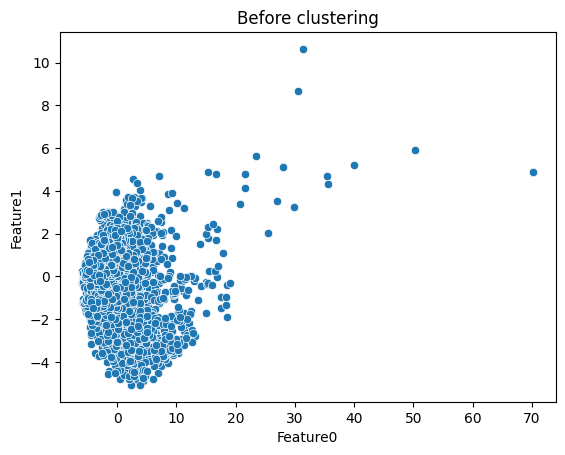

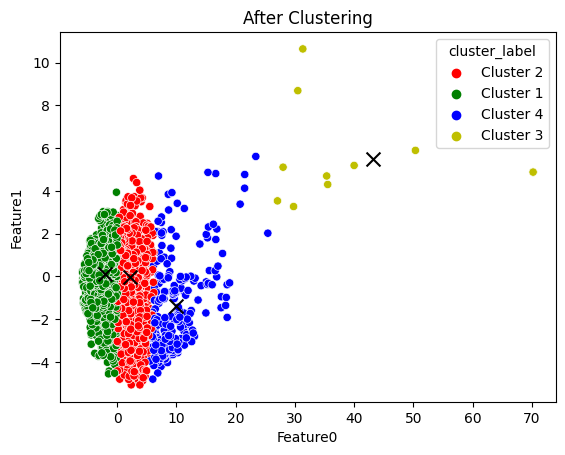

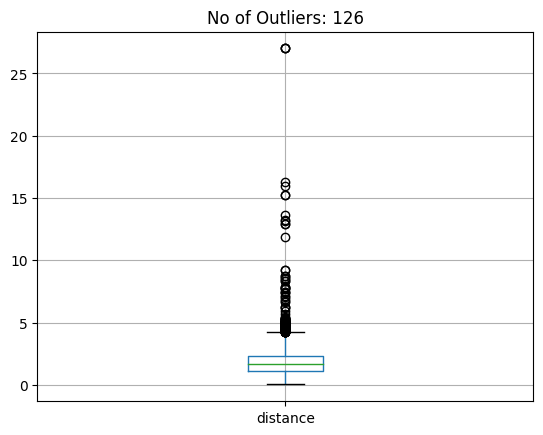

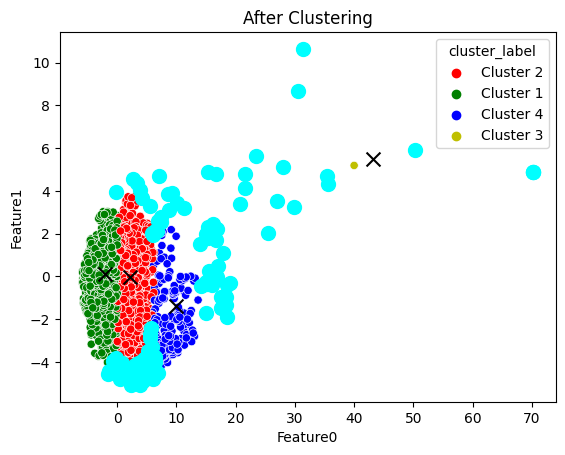

In [129]:
# we can consider no of classes as 4

mod_df = bird_df.copy()

mod_df = mod_df.drop(columns=['Unnamed: 0', 'bird', 'clip'])

scaler = StandardScaler()
data_rescaled = scaler.fit_transform(mod_df)

pca_mod = PCA(n_components=27)

pca_mod.fit(mod_df)
mod_t = pca_mod.transform(mod_df)

k_mod = KMeans(n_clusters=4, n_init = 10, init='k-means++', random_state=42)

classes = k_mod.fit_predict(mod_t)

final_df = pd.concat([mod_df.reset_index(drop=True), pd.DataFrame(mod_t, columns=constructCols(27))], axis=1)
final_df['cluster_label'] = k_mod.labels_
final_df['distance'] = distance_from_center(final_df['Feature0'], final_df['Feature1'], final_df['cluster_label'], k_mod)
centroids = np.array(k_mod.cluster_centers_)

no_of_outliers = detect_outliers_count(final_df['distance'])
outliers_idx = list(final_df.sort_values('distance', ascending=False).head(no_of_outliers).index)

outliers = final_df[final_df.index.isin(outliers_idx)]

final_df['cluster_label'] = final_df['cluster_label'].replace({0:'Cluster 1', 1:'Cluster 2', 2:'Cluster 3', 3:'Cluster 4'})

plt.figure()
sns.scatterplot(data = final_df, x='Feature0', y='Feature1') # ,palette=['r','g','b','y'])
plt.title('Before clustering')
plt.show()

# plot 2D scatter plot to cluster
plt.figure()
sns.scatterplot(data = final_df, x='Feature0', y='Feature1', hue="cluster_label", palette=['r','g','b','y'])
plt.scatter(centroids[:,0], centroids[:,1], marker="x", color='k', s=100)
plt.title('After Clustering')
plt.show()

plt.figure()
final_df.boxplot(column=['distance'])
plt.title('No of Outliers: {}'.format(no_of_outliers)) 
plt.suptitle('') # that's what you're after
plt.show()

# plot 2D scatter plot to cluster
plt.figure()
sns.scatterplot(data = final_df, x='Feature0', y='Feature1', hue="cluster_label", palette=['r','g','b','y'])
plt.scatter(centroids[:,0], centroids[:,1], marker="x", color='k', s=100)
plt.scatter(outliers['Feature0'], outliers['Feature1'], c='aqua', s=100)
plt.title('After Clustering')
plt.show()


fig = px.scatter_3d(final_df, x='Feature0', y='Feature1', z='Feature2',color='cluster_label', color_discrete_sequence=['red','green','blue','yellow'])
fig.show()


In [31]:
# since we determined 4 clusters


In [90]:
# bird_df.boxplot(column=[ 'zcr_mean'])





In [117]:
# for i in range(0,4):
#     temp_df = final_df[final_df.cluster_label == i ]
#     print(temp_df)
#     no_of_outlier = detect_outliers_iqr(temp_df['distance'])
#     temp_df.boxplot(column=['distance'])
#     print(no_of_outlier)
#     if no_of_outlier > 0:
#          outliers_idx.extend(list(temp_df.sort_values('distance', ascending=False).head(no_of_outlier).index))


45